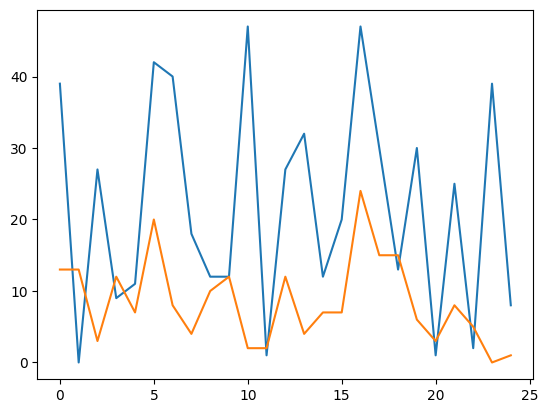

In [235]:
import random
from math import ceil
import matplotlib.pyplot as plt

rng = random.Random()

sample = [abs(ceil(rng.gauss(20, 20))) for _ in range(25)]
sample2 = [abs(ceil(rng.gauss(20, 20)/3)) for i in sample]

plt.plot(sample)
plt.plot(sample2)
plt.show()



In [1]:
dicionario = {'chave_antiga': 'valor'}

# Renomear a chave
chave_nova = 'chave_nova'
valor = dicionario.pop('chave_antiga')
dicionario[chave_nova] = valor

print(dicionario)

{'chave_nova': 'valor'}


In [3]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import CustomBusinessDay

# Definindo as datas de início e fim
data_inicial = pd.to_datetime('2023-07-01')
data_final = pd.to_datetime('2023-07-15')

# Criando o índice de datas utilizando o CustomBusinessDay
dias_uteis = pd.bdate_range(start=data_inicial, end=data_final)

# Calculando o número de dias úteis
num_dias_uteis = len(dias_uteis)

print("Número de dias úteis:", num_dias_uteis)

Número de dias úteis: 10


In [2]:
list(enumerate(l1))

[(0, 1), (1, 2), (2, 2), (3, 3)]

In [7]:
import os
os.listdir()

['copy_mdb_files.py',
 'feature_testing.py',
 'initial_solutions_evaluation.py',
 'instances-repository.zip',
 'InstancesExplanation.txt',
 'instance_deadline_update.py',
 'instance_modification.py',
 'instance_reading_fjs.py',
 'instance_translation_from_mdb_to_json.py',
 'model3_generate_instance.py',
 'model3_instances_translation.py',
 'model3_instances_translation_to_mdb.py',
 'renaming.py',
 'test.ipynb',
 'test2.ipynb',
 'write_initial_solutions_from_mdb.py']

In [12]:
import sys
import itertools
sys.path.append('./../')
from objective import Objective

l1 = [1,2]
for obj, (i, l) in itertools.product([x for x in Objective], enumerate(l1)):
    print(obj, i, l)

Objective.MAKESPAN 0 1
Objective.MAKESPAN 1 2
Objective.DEADLINE 0 1
Objective.DEADLINE 1 2


In [9]:
[i+j for i in range(5) for j in range(5) if i>=3]

[3, 4, 5, 6, 7, 4, 5, 6, 7, 8]

In [3]:
2 in set(range(5)) - set(range(3))

False

In [36]:
import os
import pandas as pd

# create an empty dataframe
sol_path = './../results-heuristic-start/sol'
# list the files in the directory
files = os.listdir(sol_path)
instances = {str.join("_",(file.split('.')[0]).split('_')[:-1]):{} for file in files}

# iterate over the files
for file in files:
    # check if the file is a solution file
    if file.endswith('.sol'):
        # get the instance name
        instance = file.split('.')[0]
        # read the solution file
        with open(os.path.join(sol_path, file), 'r') as f:
            # check if the objective value is makespan or deadline
            name = str.join("_",(file.split('.')[0]).split('_')[:-1])
            obj_type = (file.split('.')[0]).split('_')[-1]
            lines = f.readlines()
            obj = int(lines[1].split()[-1])
            instances[name][obj_type+'_obj'] = obj

df = pd.DataFrame(instances).T
df


,deadline_obj,makespan_obj
BA_01,28,44
BA_02,28,44
BA_03,75,101
BA_04,75,101
BA_05,75,101
...,...,...
URT_16,55,152
URT_17,92,222
URT_18,144,244
URT_19,199,313


In [3]:
import pandas as pd

# read the csv file
df = pd.read_csv('./../results-heuristic-start/csv/log/summary_results.csv')

# group the lines with the same prefix that only differs the suffix between 'makespan' and 'deadline'
grouped = df.groupby(df['instance'].str.split('_').str[:-1].str.join('_'))

# get only the last line for each 'instance' value in the file
result = grouped.last()

# print the result
print(result)

result.to_csv('./../test-result.csv')

          Unnamed: 0         instance  status     obj  model time (s)  \
instance                                                                
BA_01              0   BA_01_deadline       2    28.0           0.000   
BA_02              0   BA_02_deadline       2    28.0           0.002   
BA_03              0   BA_03_deadline       2    75.0           0.016   
BA_04              0   BA_04_deadline       2    75.0           0.000   
BA_05              0   BA_05_deadline       2    75.0           0.016   
...              ...              ...     ...     ...             ...   
URT_16             0  URT_16_deadline       9    55.0        3600.062   
URT_17             0  URT_17_deadline       9    92.0        3603.168   
URT_18             0  URT_18_deadline       9   144.0        3600.249   
URT_19             0  URT_19_deadline       9   199.0        3600.905   
URT_20             0  URT_20_deadline       9  5923.0        3600.090   

          total time (s)       gap  
instance     